In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
print(data.info)

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [4]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
real_x=data.iloc[:,0:8].values

In [6]:
real_y=data.iloc[:,8].values

In [7]:
print(real_x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [8]:
print(real_y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

(514, 8)
(514,)
(254, 8)
(254,)


<BarContainer object of 2 artists>

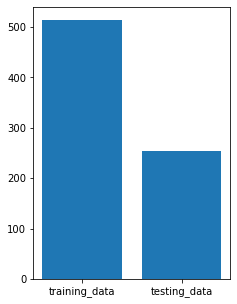

In [9]:
training_x,testing_x,training_y,testing_y=train_test_split(real_x,real_y,test_size=0.33)
print(training_x.shape)
print(training_y.shape)
print(testing_x.shape)
print(testing_y.shape)
names = ['training_data', 'testing_data']
# values = [training_x,testing_x,training_y,testing_y]
values=[514,254]
plt.figure(figsize=(12,5))

plt.subplot(131)
plt.bar(names, values)

In [10]:
s_c=StandardScaler()

In [11]:
training_x=s_c.fit_transform(training_x)


In [12]:
test_x=s_c.transform(testing_x)


In [13]:
cls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cls.fit(training_x,training_y)

KNeighborsClassifier()

In [14]:
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(training_x,training_y)

SVC(kernel='linear', random_state=42)

In [15]:
logreg = LogisticRegression()
logreg.fit(training_x,training_y)

LogisticRegression()

In [16]:
nb = GaussianNB()
nb.fit(training_x,training_y)

GaussianNB()

In [17]:
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(training_x,training_y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(training_x,training_y)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [19]:

Y_pred_logreg = logreg.predict(test_x)
Y_pred_knn=cls.predict(test_x)
Y_pred_svc = svc.predict(test_x)
Y_pred_nb = nb.predict(test_x)
Y_pred_dectree = dectree.predict(test_x)
Y_pred_ranfor = ranfor.predict(test_x)


accuracy_logreg = accuracy_score(testing_y,Y_pred_logreg)
accuracy_knn = accuracy_score(testing_y,Y_pred_knn)
accuracy_svc = accuracy_score(testing_y, Y_pred_svc)
accuracy_nb = accuracy_score(testing_y, Y_pred_nb)
accuracy_dectree = accuracy_score(testing_y, Y_pred_dectree)
accuracy_ranfor = accuracy_score(testing_y, Y_pred_ranfor)

print("Logistic Regression: " + str(accuracy_logreg*100 ))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))


Logistic Regression: 78.34645669291339
K Nearest neighbors: 72.44094488188976
Support Vector Classifier: 75.98425196850394
Naive Bayes: 78.34645669291339
Decision tree: 70.86614173228347
Random Forest: 81.10236220472441


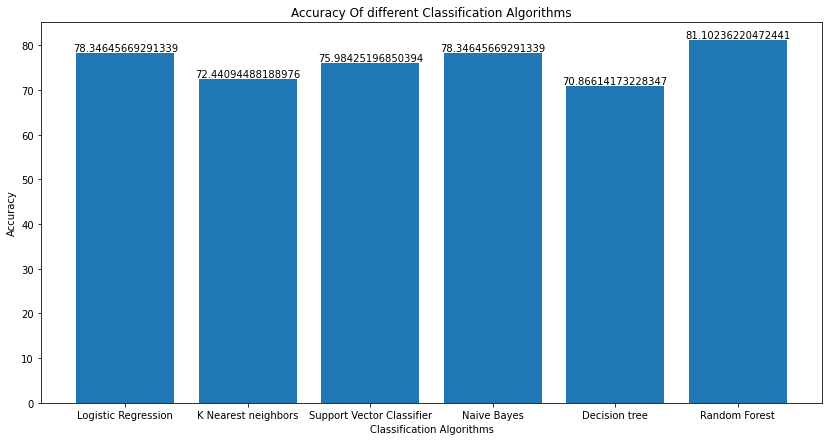

In [20]:
data = {'Logistic Regression': accuracy_logreg*100, 'K Nearest neighbors': accuracy_knn * 100, 'Support Vector Classifier':accuracy_svc * 100 , 'Naive Bayes':accuracy_nb * 100 ,'Decision tree':accuracy_dectree * 100,'Random Forest':accuracy_ranfor * 100}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(14,7))
line = plt.bar(names,values)
plt.title("Accuracy Of different Classification Algorithms")
plt.ylabel("Accuracy")
plt.xlabel("Classification Algorithms")
for i in range(len(data)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')


In [21]:
pickle.dump(logreg,open('model1.pkl','wb'))
model=pickle.load(open('model1.pkl','rb'))
print(model.predict(s_c.transform(np.array([[6,148,72,35,0,33.6,0.627,50]]))))

[1]
